<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.array([[0] for i in range(len(V[0]))])
    for i in range(len(X)):
        a = np.array(X[i])
        b = np.array(V[i])
        result += np.dot(a, b)
    return result

In [3]:
def sum_prod_test(X, V, R):
    if np.array_equal(sum_prod(X, V), R):
        print(True)
    else:
        print(False) 
        print("Было:", sum_prod(X, V))
        print("Должно быть:", R)

X = [[[1, 3],
      [4, 1]]]
V = [[[1], 
      [2]]]
R = [[7], 
     [6]]
sum_prod_test(X, V, R)

X = [[[3, 3],
      [2, 5]]]
V = [[[4], 
      [12]]]
R = [[48], 
     [68]]
sum_prod_test(X, V, R)

X = [[[1, 3],
      [4, 1]],
     [[3, 3],
      [2, 5]]]
V = [[[1], 
      [2]],
     [[4], 
      [12]]]
R = [[55], 
     [74]]
sum_prod_test(X, V, R)

X = [[[1, 3, 4],
      [4, 1, 2],
      [12, -5, -7]],
     [[3, 3, 0],
      [2, 5, 1],
      [-1, 4, 2]]]
V = [[[1], 
      [2],
      [2]],
     [[4], 
      [12],
      [0]]]
R = [[63], 
     [78],
     [32]]
sum_prod_test(X, V, R)

True
True
True
True


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M, threshold=0.5):
    M = np.array(M)
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if M[i, j] > threshold:
                M[i, j] = 1
            else:
                M[i, j] = 0
    return M

In [47]:
def binarize_test(X, a, R):
    if np.array_equal(binarize(X, a), R):
        print(True)
    else:
        print(False) 
        print("Было:", binarize(X, a))
        print("Должно быть:", R)

binarize_test([[1, 3, 4], [4, 1, 2], [12, -5, -7]], 3, [[0, 0, 1], [1, 0, 0], [1, 0, 0]])
binarize_test([[1, 3, 4], [4, 1, 2], [12, -5, -7]], 0, [[1, 1, 1], [1, 1, 1], [1, 0, 0]])
binarize_test([[-1000, 3000, 7], [4, 0, 2]], -3, [[0, 1, 1], [1, 1, 1], ])

True
True
True


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
def unique_rows(mat):
    mat = np.array(mat)
    result = []
    for i in range(mat.shape[0]):
        result.append([int(i) for i in set(mat[i, :])])
    return result

def unique_columns(mat):
    mat = np.array(mat)
    result = []
    for i in range(mat.shape[1]):
        result.append([int(i) for i in set(mat[:, i])])
    return result 

print(unique_rows([[1, 3, 1], [1, -2, 2], [-5, -5, 2]]))
print(unique_columns([[1, 3, 1], [1, -2, 2], [-5, -5, 2]]))

[[1, 3], [1, 2, -2], [2, -5]]
[[1, -5], [3, -2, -5], [1, 2]]


In [73]:
def unique_rows_test(X, R):
    if unique_rows(X) == R:
        print(True)
    else:
        print(False) 
        print("Было:", unique_rows(X))
        print("Должно быть:", R)

unique_rows_test([[1, 3, 1], [1, -2, 2], [-5, -5, 2]], [[1, 3], [1, 2, -2], [2, -5]])
unique_rows_test([[2, 3, 2], [1, 2, 2], [-5, -5, -5]], [[2, 3], [1, 2], [-5]])
unique_rows_test([[1, 3], [1, 1], [0, 0]], [[1, 3], [1], [0]])

def unique_columns_test(X, R):
    if unique_columns(X) == R:
        print(True)
    else:
        print(False) 
        print("Было:", unique_columns(X))
        print("Должно быть:", R)

unique_columns_test([[1, 3, 1], [1, -2, 2], [-5, -5, 2]], [[1, -5], [3, -2, -5], [1, 2]])
unique_columns_test([[2, 3, 2], [1, 2, 2], [-5, -5, -5]], [[1, 2, -5], [2, 3, -5], [2, -5]])
unique_columns_test([[1, 3], [1, 1], [0, 0]], [[0, 1], [0, 1, 3]])

True
True
True
True
True
True


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

[[ 1.30291753e+00 -1.15913238e+00  5.55079672e-01 -1.28406254e+00
  -4.30298432e-01 -1.96053210e+00 -4.42809100e-01  4.81142928e-01
   8.98295426e-01 -8.35877404e-01  5.38294510e-01  1.93490142e-01
  -5.85106182e-01 -1.57289545e+00  1.32235546e+00]
 [-1.49693735e+00 -8.55231318e-01  2.31318864e-01  1.10311821e+00
  -1.42988033e+00  5.98906310e-01 -2.02142585e+00 -7.51615921e-01
  -6.41533836e-01  8.65495297e-02  4.18591446e-01 -4.51501233e-01
  -9.23977374e-01  3.64645159e+00  1.70513641e-02]
 [-9.16211733e-01  6.63383707e-01 -3.89870635e-01  3.69059528e-01
   2.55145766e-01 -6.34395317e-01 -9.39658963e-01 -2.00403528e+00
  -7.32450375e-02 -1.12904835e+00 -1.18919449e+00  1.31604100e+00
   2.71423118e-01  1.36511250e+00  1.94599214e+00]
 [ 4.03995506e-01  6.02516262e-01  1.65342691e-01  2.22806510e-01
   9.96386309e-01 -2.58312680e-01  4.16534074e-01 -9.97892683e-01
   4.01697812e-01 -6.19514811e-01 -5.13647095e-01  8.48242602e-01
   5.55786719e-01 -9.28856990e-01 -1.15255965e+00]
 [-3

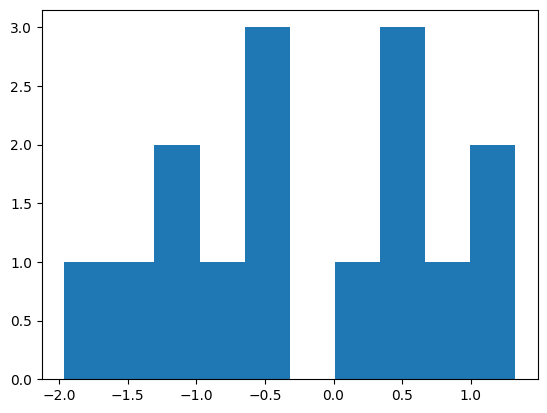

математическое ожидание 2 строки: -0.16467439323533814
дисперсия 2 строки: 1.7225969156324359


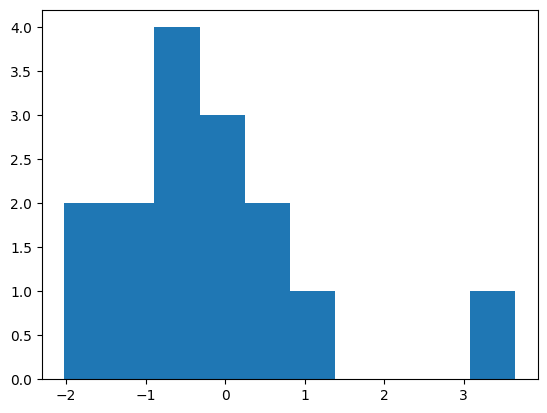

математическое ожидание 3 строки: -0.07263347011926032
дисперсия 3 строки: 1.1337076834717343


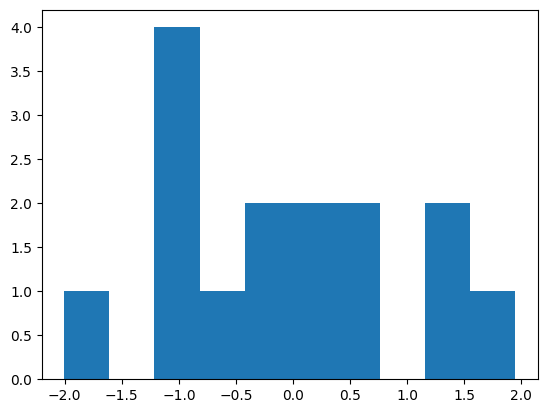

математическое ожидание 4 строки: 0.009501638317357309
дисперсия 4 строки: 0.45728286811971885


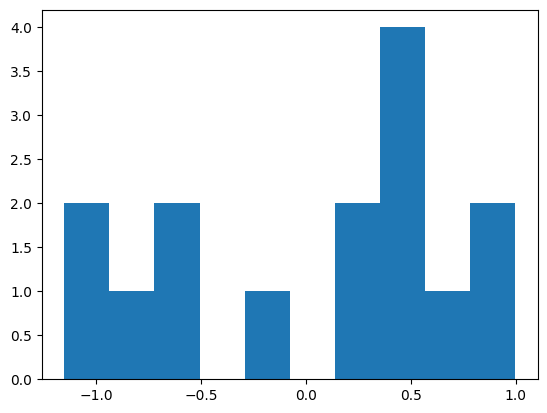

математическое ожидание 5 строки: -0.0784259738701684
дисперсия 5 строки: 0.5812964028759615


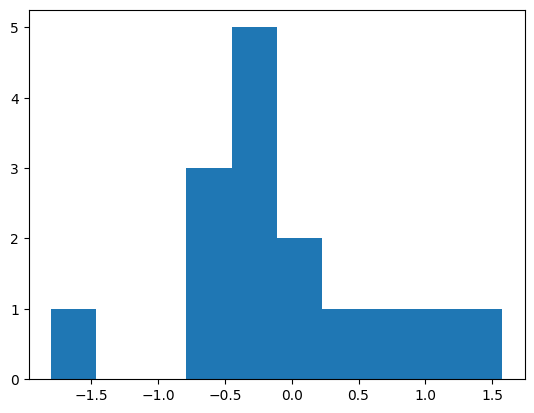

математическое ожидание 6 строки: -0.4478559398779693
дисперсия 6 строки: 0.582666028807107


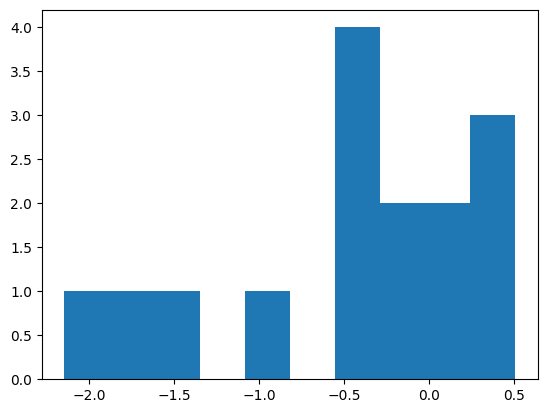

математическое ожидание 7 строки: -0.42229862290521425
дисперсия 7 строки: 0.8377221919878373


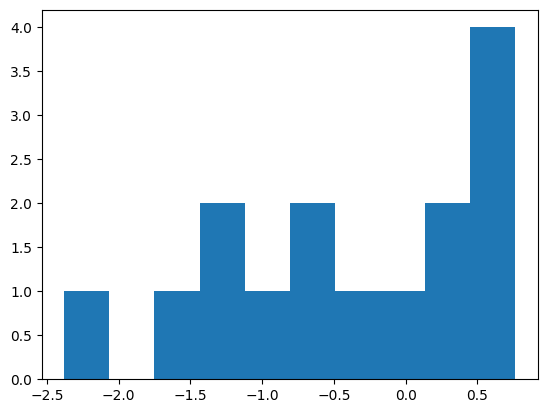

математическое ожидание 8 строки: 0.40535859656575834
дисперсия 8 строки: 1.5265471528109502


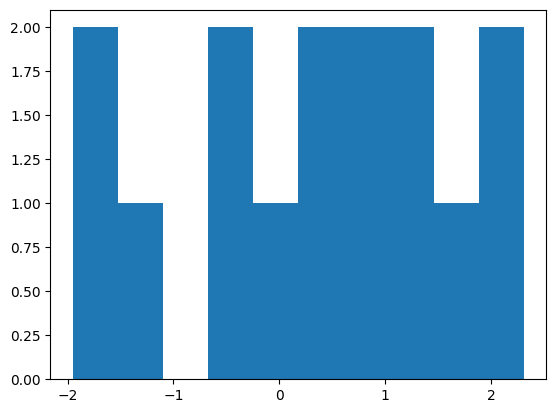

математическое ожидание 9 строки: -0.1519121948855723
дисперсия 9 строки: 0.7890070183486197


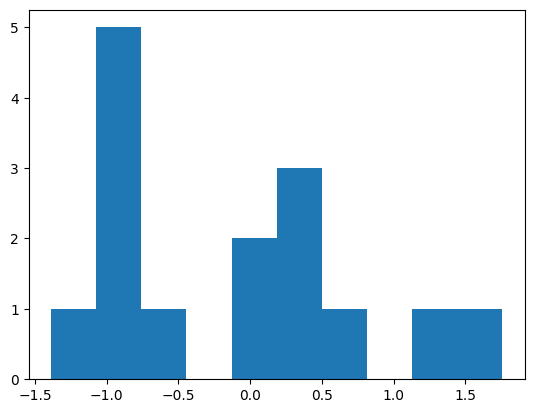

математическое ожидание 10 строки: 0.25076017990802474
дисперсия 10 строки: 1.445885160971252


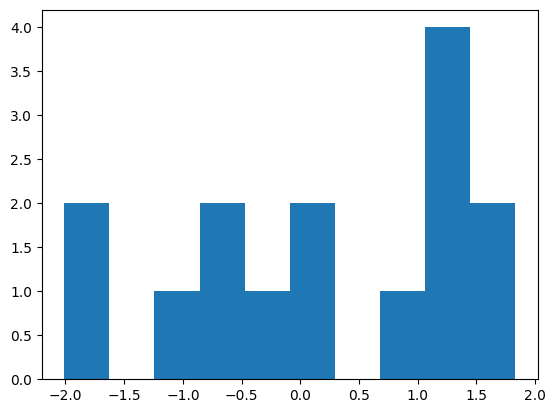

математическое ожидание 11 строки: 0.07991091091891551
дисперсия 11 строки: 0.7842513766597928


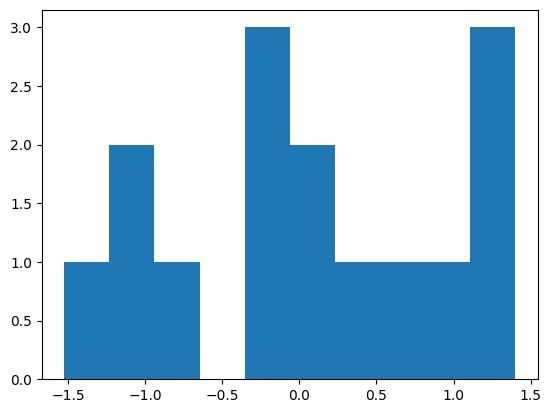

математическое ожидание 12 строки: -0.3109994197725426
дисперсия 12 строки: 0.8975848280056532


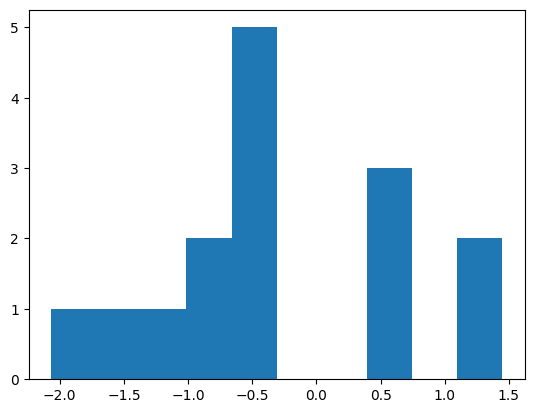

математическое ожидание 13 строки: 0.22325479585307
дисперсия 13 строки: 1.1401700217706978


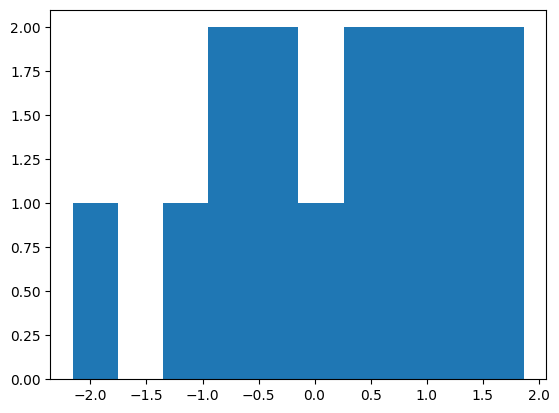

математическое ожидание 14 строки: 0.2639743594424529
дисперсия 14 строки: 1.2895955736633389


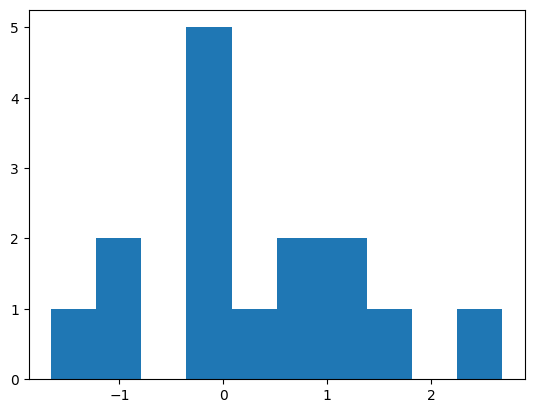

математическое ожидание 15 строки: 0.3113256656067774
дисперсия 15 строки: 0.8689986602320349


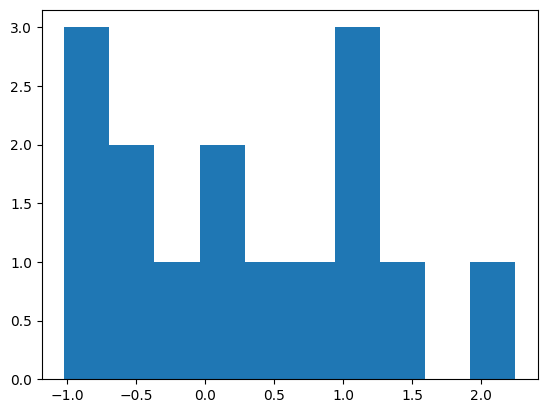

математическое ожидание 16 строки: 0.2804954444631621
дисперсия 16 строки: 1.003703164885137


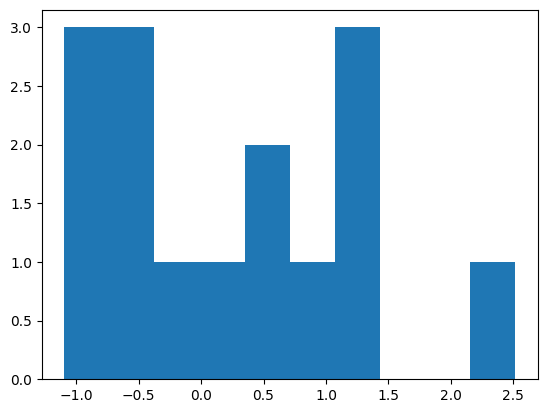

математическое ожидание 17 строки: 0.028069932371229307
дисперсия 17 строки: 1.3587487029869567


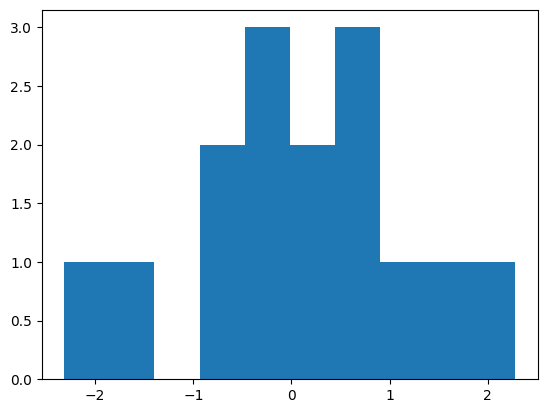

математическое ожидание 18 строки: -0.32148321242512984
дисперсия 18 строки: 0.631173025982234


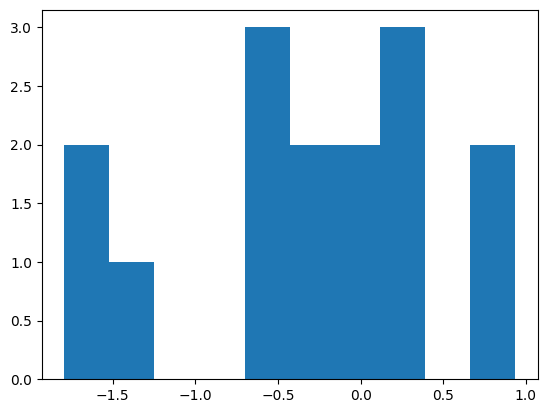

математическое ожидание 19 строки: 0.32939447766088803
дисперсия 19 строки: 0.5955960428485414


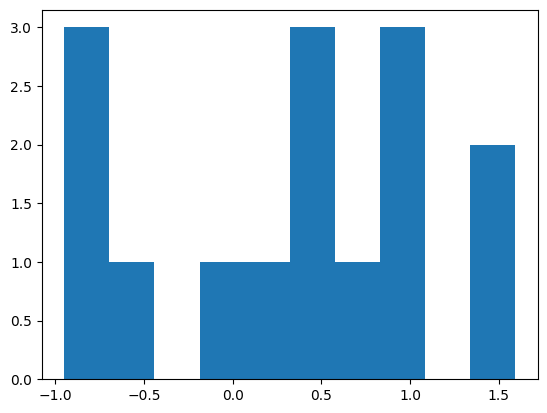

математическое ожидание 20 строки: 0.07357640029127141
дисперсия 20 строки: 1.7837160219965378


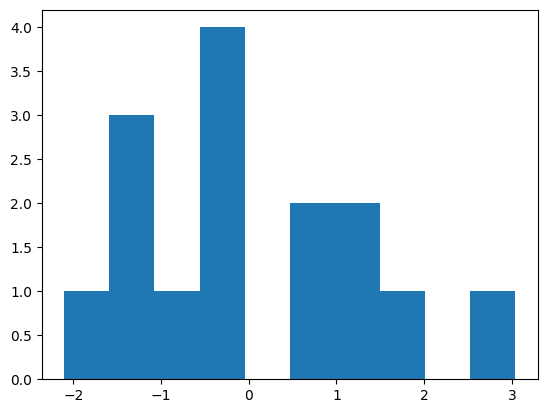

математическое ожидание 21 строки: 0.2695977335739299
дисперсия 21 строки: 1.3141624185716212


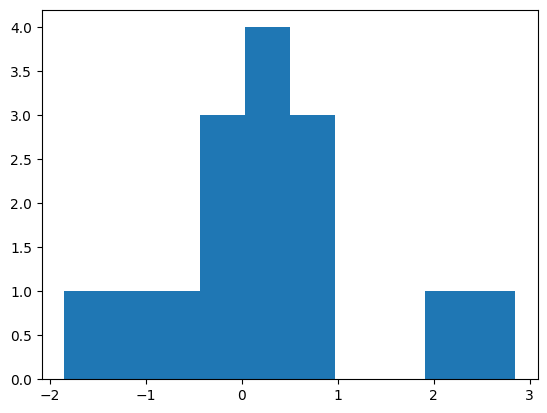

математическое ожидание 22 строки: -0.027407645822431596
дисперсия 22 строки: 0.5733127320462951


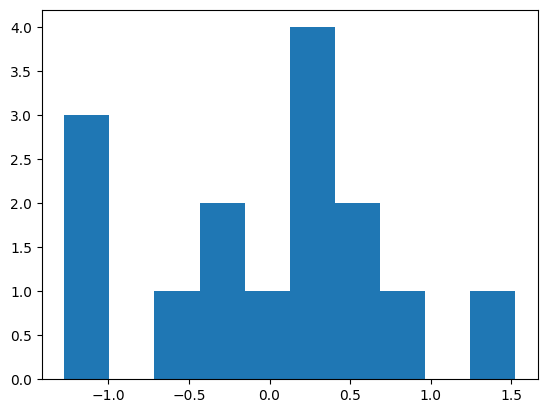

математическое ожидание 23 строки: 0.0015676531869338595
дисперсия 23 строки: 0.26583873606814107


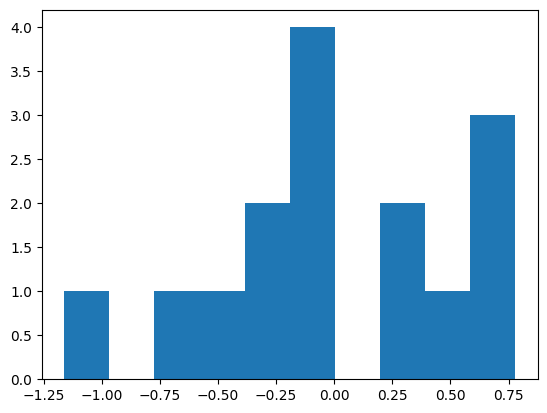

математическое ожидание 24 строки: -0.41368608898913206
дисперсия 24 строки: 0.9212451743241281


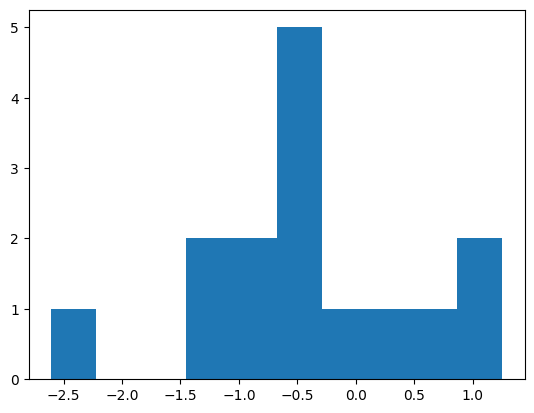

математическое ожидание 25 строки: 0.1924048655150798
дисперсия 25 строки: 0.8392456190097424


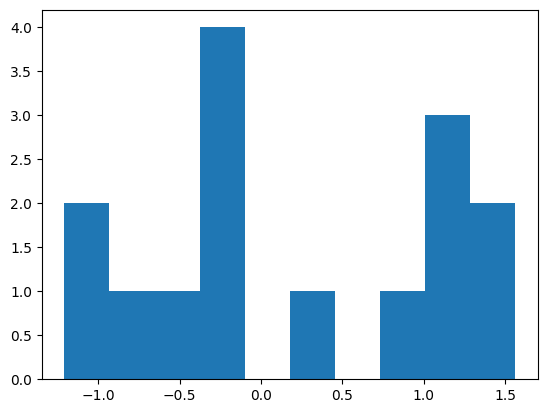


математическое ожидание 1 столбца: -0.18927876300740634
дисперсия 1 столбца: 0.6278610141296573


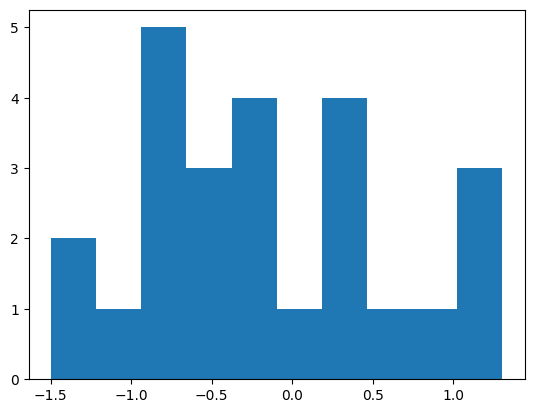

математическое ожидание 2 столбца: 0.08183209042584132
дисперсия 2 столбца: 1.209257489407267


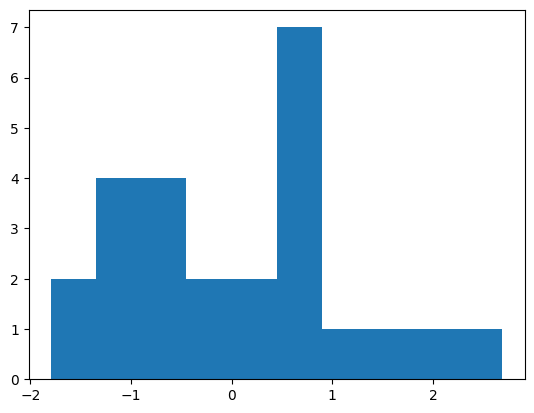

математическое ожидание 3 столбца: 0.1901110586171606
дисперсия 3 столбца: 0.8502390117339987


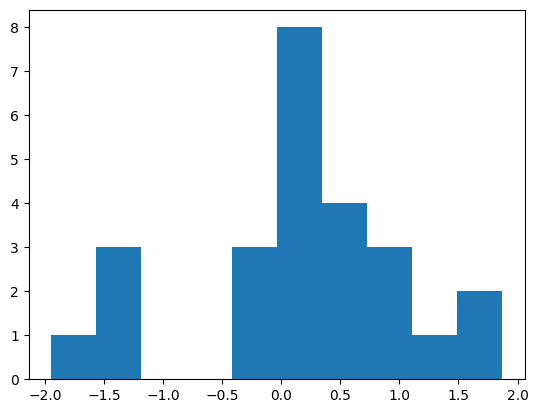

математическое ожидание 4 столбца: 0.09588444444463566
дисперсия 4 столбца: 1.0211904421667786


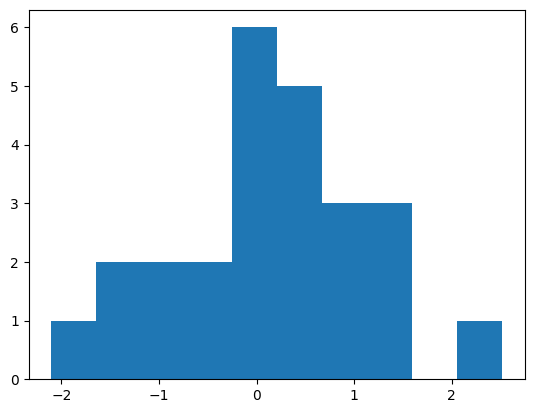

математическое ожидание 5 столбца: 0.11358120366025652
дисперсия 5 столбца: 0.9373607876495277


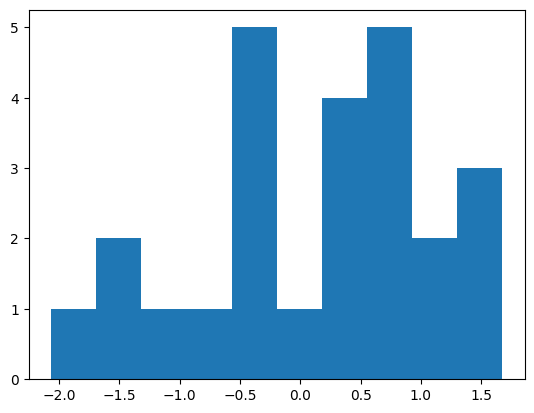

математическое ожидание 6 столбца: -0.25319463857299446
дисперсия 6 столбца: 1.0804558032035643


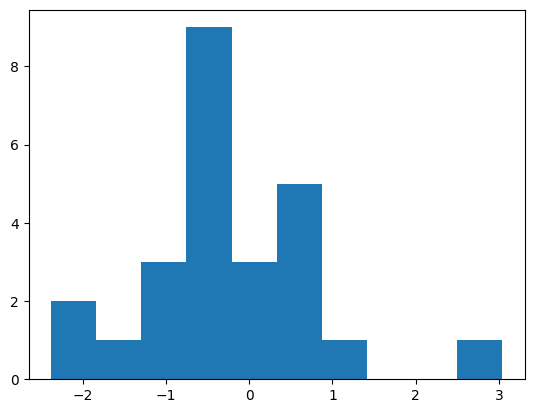

математическое ожидание 7 столбца: -0.2596271762522454
дисперсия 7 столбца: 1.1766242453841858


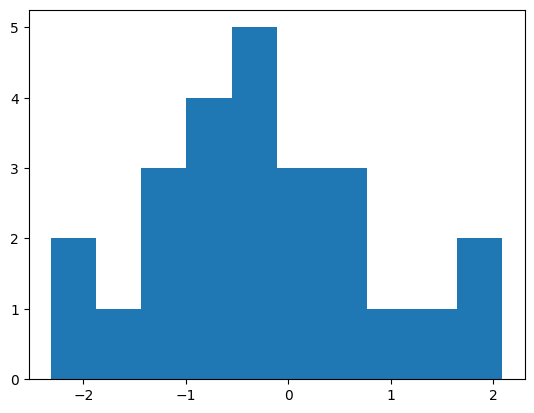

математическое ожидание 8 столбца: 0.16116735077370264
дисперсия 8 столбца: 0.794240532593362


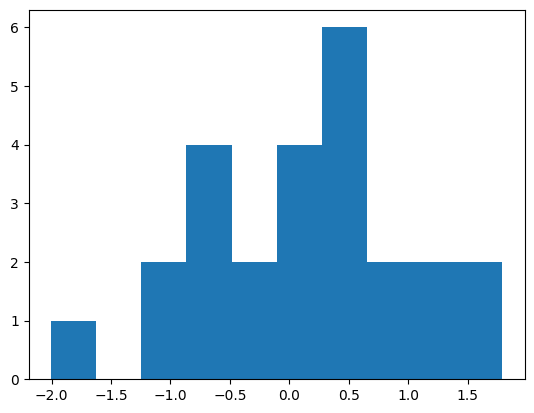

математическое ожидание 9 столбца: 0.16979779226762695
дисперсия 9 столбца: 0.735097371950712


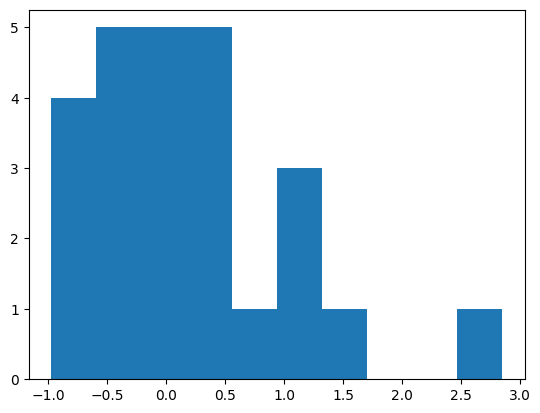

математическое ожидание 10 столбца: -0.27450662461521025
дисперсия 10 столбца: 0.8508482329061674


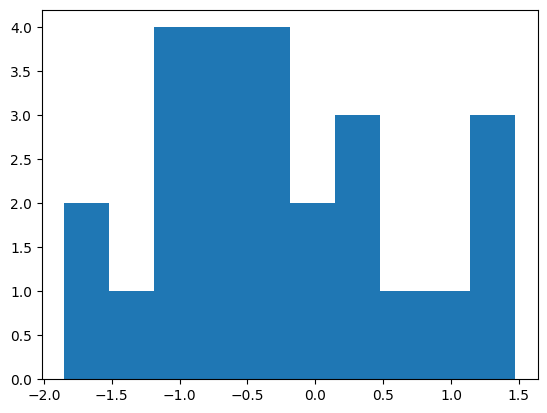

математическое ожидание 11 столбца: -0.12551631679554107
дисперсия 11 столбца: 0.7762209372598456


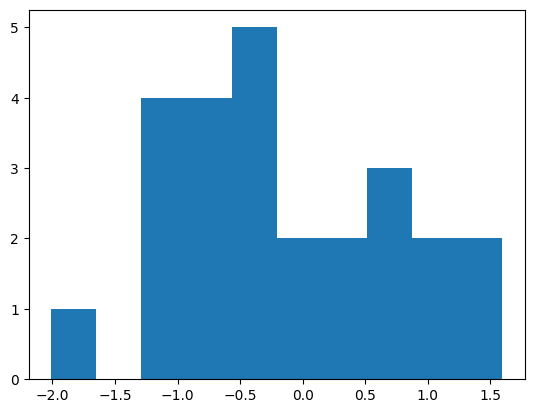

математическое ожидание 12 столбца: 0.14872595966660393
дисперсия 12 столбца: 1.0869409135049326


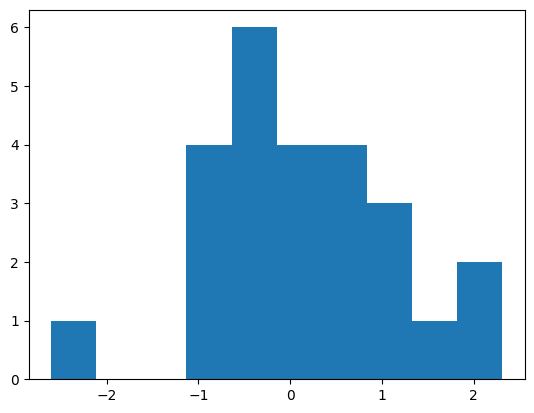

математическое ожидание 13 столбца: -0.1790471954404619
дисперсия 13 столбца: 0.8026905626187384


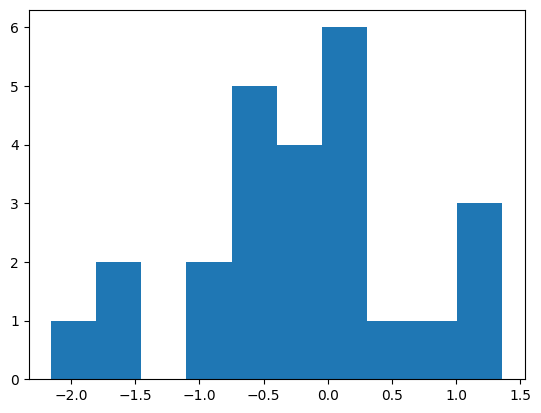

математическое ожидание 14 столбца: 0.09020145483626711
дисперсия 14 столбца: 1.4978570611136621


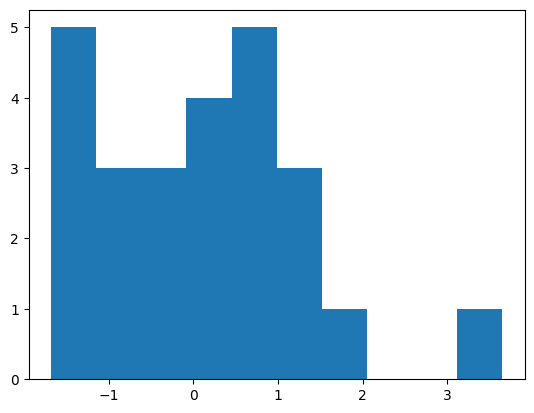

математическое ожидание 15 столбца: 0.2953932587170291
дисперсия 15 столбца: 1.6053009199406971


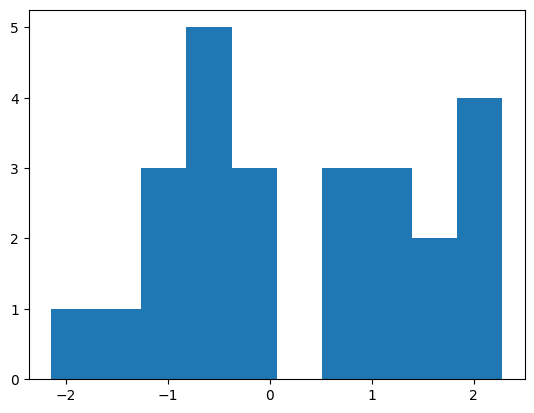

In [22]:
def generate_matrix(m, n):
    A = np.random.normal( size=(m, n))
    print(A)
    print()
    for i in range(m):
        print(f'математическое ожидание {i+1} строки:', np.mean(A[i, :]))
        print(f'дисперсия {i+1} строки:', np.var(A[i, :]))
        plt.figure()
        plt.hist(A[i, :])
        plt.show()
    print()
    for i in range(n):
        print(f'математическое ожидание {i+1} столбца:', np.mean(A[:, i]))
        print(f'дисперсия {i+1} столбца:', np.var(A[:, i]))
        plt.figure()
        plt.hist(A[:, i])
        plt.show()
    print()

generate_matrix(25, 15)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [24]:
def chess(m, n, a, b):
    result = np.ones((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                result[i, j] = a
            else:
                result[i, j] = b
    return result

print(chess(5, 5, 1, 2))

[[1. 2. 1. 2. 1.]
 [2. 1. 2. 1. 2.]
 [1. 2. 1. 2. 1.]
 [2. 1. 2. 1. 2.]
 [1. 2. 1. 2. 1.]]


In [26]:
def chess_test(m, n, a, b, R):
    if np.array_equal(chess(m, n, a, b), R):
        print(True)
    else:
        print(False) 
        print("Было:", chess(m, n, a, b))
        print("Должно быть:", R)

R = np.array([[1,2,1, 2, 1],[2,1, 2, 1, 2],[1,2,1, 2, 1],[2,1, 2, 1, 2],[1,2,1, 2, 1]])
chess_test(5, 5, 1, 2, R)
R = np.array([[1,0,1, 0, 1],[0,1, 0, 1, 0],[1,0,1, 0, 1],[0,1, 0, 1, 0],[1,0,1, 0, 1]])
chess_test(5, 5, 1, 0, R)

True
True


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

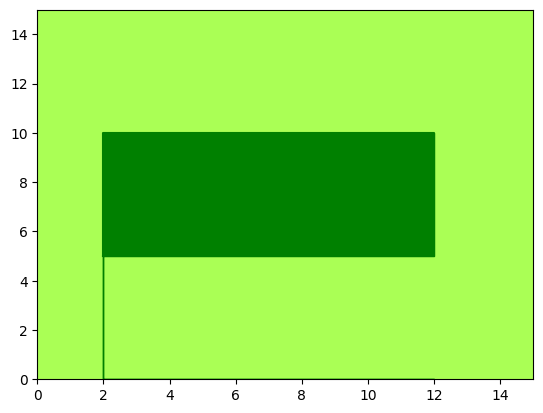

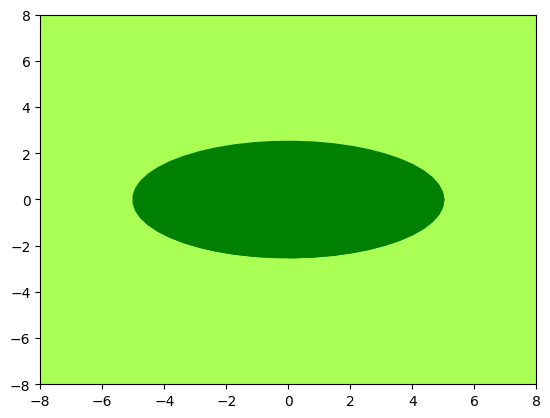

In [50]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    plt.figure()
    x_k = (n - a) // 2
    y_k = (m - b) // 2
    x = np.array([0 + x_k, a + x_k, a + x_k, 0 + x_k, 0 + x_k])
    y = np.array([0 + y_k, 0 + y_k, b + y_k, b + y_k, 0 + y_k])
    plt.plot(x, y, color=rectangle_color)
    plt.xlim(0, n)
    plt.ylim(0, m)
    plt.gca().set_facecolor(background_color)
    plt.fill_between(x, y, color=rectangle_color)
    plt.show()
    

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    plt.figure()
    t  =  np.linspace(0, 2 * np.pi)
    plt.plot ( (a / 2) * np.cos ( t ) , (b / 2 ) * np.sin ( t ),  color=ellipse_color)
    plt.xlim(-n // 2, (n + 1) // 2)
    plt.ylim(-m // 2, (m + 1) // 2)
    plt.gca().set_facecolor(background_color)
    plt.fill_between((a / 2) * np.cos ( t ) , (b / 2 ) * np.sin ( t ),  color=ellipse_color)
    plt.show()

draw_rectangle(10, 5, 15, 15, 'g', '#AF5')
draw_ellipse(10, 5, 15, 15, 'g', '#AF5')

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [7]:
def time(S, p):
    print("Математическое ожидание:", np.mean(S))
    print("Дисперсия:", np.var(S))
    print("СКО:", np.std(S))
    L_min = []
    L_max = []
    for i in range(len(S) - 2):
        if S[i] < S[i+1] and S[i + 1] > S[i + 2]:
            L_max.append(S[i + 1])
        if S[i] > S[i+1] and S[i + 1] < S[i + 2]:
            L_min.append(S[i+1])
    print("Локальные минимумы:", L_min)
    print("Локальные максимумы:", L_max)
    S_sum = sum(S[:p - 1])
    moving_average = []
    for i in range(len(S) - p):
        S_sum += S[i + p - 1]
        moving_average.append(S_sum / p)
        S_sum -= S[i]
    print("Скользящее среднее:", moving_average)

time([11, 4, 6, 8, 7, 24, 20], 3)


Математическое ожидание: 11.428571428571429
Дисперсия: 49.673469387755105
СКО: 7.047940790596577
Локальные минимумы: [4, 7]
Локальные максимумы: [8, 24]
Скользящее среднее: [7.0, 6.0, 7.0, 13.0]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [55]:
def one_hot_encoding(array):
    Max = max(array)
    result = []
    for i in array:
        A = [0] * (Max + 1)
        A[i] = 1
        result.append(A)
    return result 


In [56]:
def one_hot_encoding_test(X, R):
    if one_hot_encoding(X) == R:
        print(True)
    else:
        print(False) 
        print("Было:", one_hot_encoding(X))
        print("Должно быть:", R)

one_hot_encoding_test([0, 2, 3, 0], [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]])
one_hot_encoding_test([0, 2, 5, 0, 1], [[1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]])

True
True
